In [1]:
import pandas as pd
import numpy as np
import scipy as scipy
from tqdm import tqdm
from datetime import datetime, timedelta
from sklearn.naive_bayes import  GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
np.random.seed(9719)


In [4]:
df_train = pd.read_csv("https://liangfgithub.github.io/Data/coding5_train.csv")
df_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V248,V249,V250,V251,V252,V253,V254,V255,V256,Y
0,-1,-1.0,-1.000,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,5
1,-1,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.912,...,-0.257,0.480,0.966,0.408,-0.895,-1.000,-1.000,-1.000,-1.0,5
2,-1,-1.0,-1.000,-0.449,1.000,1.000,1.000,1.000,1.000,0.840,...,0.626,1.000,0.830,0.494,-0.343,-1.000,-1.000,-1.000,-1.0,5
3,-1,-1.0,-1.000,-1.000,-0.989,-0.185,0.626,1.000,0.672,0.372,...,0.765,0.372,-0.163,-0.968,-1.000,-1.000,-1.000,-1.000,-1.0,5
4,-1,-1.0,-0.999,-0.699,-0.684,-0.909,-1.000,-0.764,-0.684,-0.303,...,0.438,0.903,0.762,0.140,-0.716,-1.000,-1.000,-1.000,-1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,-1.0,-1.000,-1.000,-1.000,-0.976,0.641,-0.406,-1.000,-1.000,...,-0.177,-0.796,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,6
196,-1,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,6
197,-1,-1.0,-1.000,-1.000,-1.000,-1.000,-0.982,0.824,0.178,-1.000,...,1.000,0.579,0.279,-0.430,-0.996,-1.000,-1.000,-1.000,-1.0,6
198,-1,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.718,0.800,1.000,...,0.789,1.000,0.696,0.219,-0.672,-1.000,-1.000,-1.000,-1.0,6


In [5]:
#df_train.describe()

In [6]:

X_train = df_train.drop(columns=["Y"])

y_train = df_train["Y"]


In [7]:
df_test = pd.read_csv("https://liangfgithub.github.io/Data/coding5_test.csv")
df_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V248,V249,V250,V251,V252,V253,V254,V255,V256,Y
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,0.415,0.508,0.787,...,0.993,1.000,0.724,0.184,-0.003,-0.908,-1.000,-1.000,-1.0,5
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.812,-0.856,...,-1.000,-1.000,-0.860,-0.809,-1.000,-1.000,-1.000,-1.000,-1.0,5
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.995,-0.125,0.347,0.347,...,0.356,0.347,-0.312,-0.981,-1.000,-1.000,-1.000,-1.000,-1.0,5
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.927,0.361,...,1.000,1.000,1.000,0.650,0.278,-0.280,-0.734,-0.988,-1.0,5
4,-1.0,-1.0,-1.0,-1.0,-1.0,-0.854,-0.957,-1.000,-1.000,-1.000,...,1.000,0.920,0.070,-0.780,-0.994,-1.000,-1.000,-1.000,-1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.087,-0.879,...,-0.931,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,6
596,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.865,0.483,...,0.821,0.566,-0.166,-0.985,-1.000,-1.000,-1.000,-1.000,-1.0,6
597,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.980,0.332,...,0.848,0.770,0.093,-0.769,-1.000,-1.000,-1.000,-1.000,-1.0,6
598,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.999,0.049,0.727,-0.404,...,0.270,-0.744,-0.978,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,6


In [8]:
X_test = df_test.drop(columns=["Y"])
y_test = df_test["Y"]

In [9]:
class MyModel_V1:
    def __init__(self):
        self.model = GaussianNB()
        return
    
    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)
    
    def evluate(self, X, y):
        y_pred = self.model.predict(X)
        cm = confusion_matrix(y, y_pred)
        error = 1 - np.sum(np.diag(cm)) / np.sum(cm)
        print("Error=", np.round(error, 2))
        print("Confusion Matrix:")
        ConfusionMatrixDisplay.from_predictions(y, y_pred)

        

Error= 0.14
Confusion Matrix:


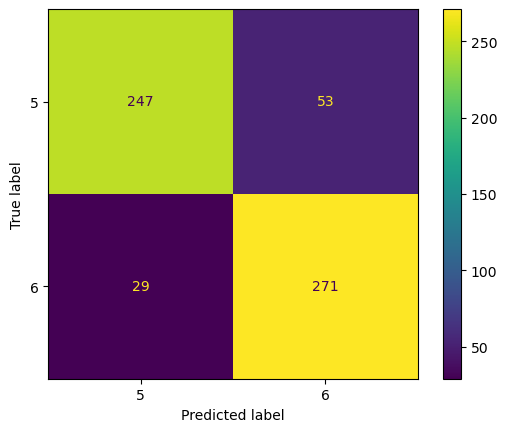

In [10]:
model = MyModel_V1()
model.fit(X_train, y_train)
model.evluate(X_test, y_test)

In [26]:
class MyModel_V2:
    def __init__(self):
        self.iter = 100
        self.threshold = 10**-10
        return
    
    def fit(self, X, y):
        self.beta = np.random.rand(X.shape[1])
        y_corrected = y - 5
        self.iterate_update(X, y_corrected)
        #self.model.fit(X, y)

    def predict(self, X):
        y_pred = np.round(scipy.special.expit(np.dot(X[:], self.beta)), 2)
        y_pred = y_pred + 5
        y_pred = y_pred.astype(int)
        return y_pred
    
    def iterate_update(self, X, y):
        beta = self.beta
        for i in range(self.iter):
            X_beta = np.dot(X[:], beta)
            p = scipy.special.expit(X_beta)
            W = np.diag(p * (1-p))

            z = X_beta + np.linalg.pinv(W) @ (y-p)
            
            beta_new = np.linalg.pinv(X.T @ W @ X) @ X.T @ W @ z

            #print(f"iteration:{i}")
            
            log_likelihood_1 = np.sum(y * np.log(scipy.special.expit(np.dot(X[:], beta))) 
                                      + (1-y) * np.log(1- scipy.special.expit(np.dot(X[:], beta))) )
            log_likelihood_2 = np.sum(y * np.log(scipy.special.expit(np.dot(X[:], beta_new))) 
                                      + (1-y) * np.log(1- scipy.special.expit(np.dot(X[:], beta_new))) )
            gain = np.sum(log_likelihood_1 - log_likelihood_2)
            
            #print(f"gain=", gain)
            if np.isnan(gain) or abs(gain) > self.threshold:
                beta = beta_new
            else:
                break
        self.beta = beta
        return
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        cm = confusion_matrix(y, y_pred)
        error = 1 - np.sum(np.diag(cm)) / np.sum(cm)
        print("Error=", np.round(error, 4))
        print("Confusion Matrix:")
        ConfusionMatrixDisplay.from_predictions(y, y_pred)

        

Error= 0.4117
Confusion Matrix:


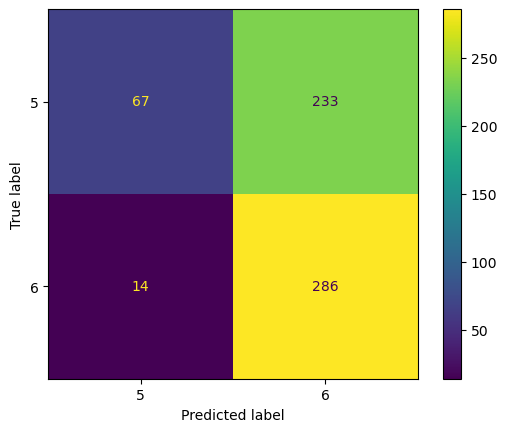

In [27]:
model = MyModel_V2()
model.fit(X_train, y_train)
model.evaluate(X_test, y_test)

In [35]:
class Pegasos_Model:
    def __init__(self):
        self.iter = 20
        self.threshold = 10**-10
        self.learning_rate = 1
        return
    
    def fit(self, X, y):
        self.beta = np.zeros(X.shape[1])
        self.alpha = 0
        
        y_corrected = np.copy(y)
        y_corrected[y_corrected==5] = -1
        y_corrected[y_corrected==6] = 1
        
        self.iterate_update(X, y_corrected)

    def predict(self, X):
        y_pred = np.dot(X[:], self.beta) + self.alpha
        y_pred[y_pred > 0] = 6
        y_pred[y_pred < 0] = 5
        return y_pred
    
    def iterate_update(self, X, y):
        n = X.shape[0]
        t = 0
        for epoch in range(self.iter):
            for i in range(n):
                t = t+1
                eta = 1 / (t*self.learning_rate)
                
                var1 = y[i] * (np.dot(X.iloc[i], self.beta) + self.alpha)
                
                if var1 < 1:
                    nabla = self.learning_rate * self.beta - y[i] * X.iloc[i]
                    delta = -y[i]
                else:
                    nabla = self.learning_rate * self.beta
                    delta = 0
                
                self.beta = self.beta - eta * nabla
                self.alpha = self.alpha - eta * delta
                
                #print(f"self.beta={self.beta}")
                #print(f"self.alpha={self.alpha},var1={var1}, eta={eta}, delta={delta},")
                
        return
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        cm = confusion_matrix(y, y_pred)
        error = 1 - np.sum(np.diag(cm)) / np.sum(cm)
        print("Error=", np.round(error, 4))
        print("Confusion Matrix:")
        ConfusionMatrixDisplay.from_predictions(y, y_pred)

        

Error= 0.0667
Confusion Matrix:


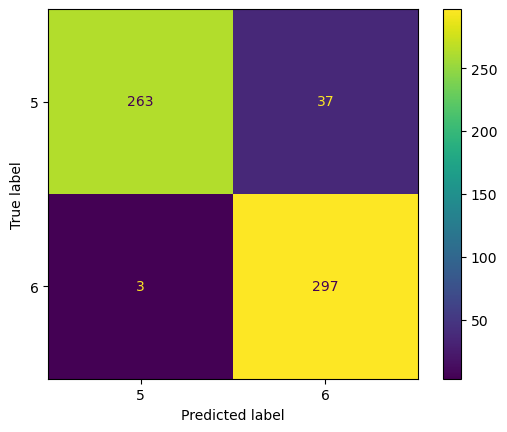

In [36]:
model = Pegasos_Model()
model.fit(X_train, y_train)
model.evaluate(X_test, y_test)

In [67]:
class Pegasos:
    """Fitting and predicting with Pegasos (SVM subgradient-descent with a linear kernel)

    References:
        [1] https://home.ttic.edu/~nati/Publications/PegasosMPB.pdf
        [2] https://courses.engr.illinois.edu/ece543/sp2017/projects/Wenxuan%20Zhou.pdf
        [3] https://karlstratos.com/notes/pegasos.pdf

    Attributes:
        verbose: Boolean to print training and eval progress
        rng: RNG to randomize the order of the training dataset
        epochs: Number of passes through the training dataset
        lambda_reg: Regularization parameter of SVM (lambda)
        beta: p-dimensional coefficient vector for the loss
        alpha: intercept for the loss
        iter: Number of iterations

    """

    def __init__(self, epochs: int = 20, lambda_reg: float = 1.0, seed: int = None, verbose: bool = True):
        """Initialize algorithm with hyperparameters.

        Args:
          epochs: Number of passes through the training dataset
          lambda_reg: Regularization parameter of SVM
          seed: Seed(s) for RNG, can be an int or list
          verbose: Print informative runtime logs
        """

        self.verbose = verbose
        self.rng = np.random.default_rng(seed)
        self.lambda_reg = lambda_reg
        self.epochs = epochs
        self.beta = None
        self.alpha = None
        self.iter = None


    def validate_inputs(self, X, y):
        """Assert that the inputs are valid"""

        # Assert that the labels contain two classes
        classes = sorted(set(y))
        assert len(classes) == 2, f"Binary classification cannot proceed with {len(classes)} classes"

        # Assert compatible X and y shapes
        assert X.shape[0] == y.shape[0], f"X and y have incompatible shapes: (X: {X.shape[0]}, y: {y.shape[0]})"

    def compute_eta(self, iteration):
        """Decrease learning rate proportionally to number of iterations"""

        return 1.0 / (self.lambda_reg * iteration)

    def update_beta(self, X_t, y_t, eta, loss):
        """Update coefficient vector"""

        if loss < 1:
            subgradient = (self.lambda_reg * self.beta) - (X_t * y_t)
        else:
            subgradient = (self.lambda_reg * self.beta)
        self.beta -= eta * subgradient

    def update_alpha(self, y_t, eta, loss):
        """Update bias term"""

        if loss < 1:
            subgradient = -y_t
            # subgradient = math.copysign(1, -y_t)
        else:
            subgradient = 0
        self.alpha -= eta * subgradient

    def svm_step(self, X_t, y_t, eta, iter):
        """Perform single step update for SVM"""

        loss = y_t * (np.inner(X_t, self.beta) + self.alpha)
        self.update_beta(X_t, y_t, eta, loss)
        self.update_alpha(y_t, eta, loss)
        
        #print(f"self.beta={self.beta}")
        #print(f"self.alpha={self.alpha},loss={loss},eta={eta}")
        #print(self.alpha)

        if (self.verbose) and (iter % 1000 == 0 or iter == 1):
            print(f"iter: {iter:<10}\t loss: {loss:<8.4f}\t alpha: {self.alpha:<8.4f}")

    def fit(self, X, y):
        """Apply the algorithm to training data"""

        # Validate algorithm inputs
        self.validate_inputs(X, y)

        m = X.shape[0]      # Number of samples
        p = X.shape[1]      # Number of features

        # Initialize parameters
        self.beta = np.zeros(p)
        self.alpha = 0
        self.iter = 0

        for epoch in range(1, self.epochs + 1):

            # Sample from a different permutation for every epoch
            X = np.copy(X)          # Make a copy for reproducibility...
            #self.rng.shuffle(X)     # since this shuffles the array in-place.

            for i in range(m):
                self.iter += 1
                eta = self.compute_eta(self.iter)
                self.svm_step(X[i], y[i], eta, self.iter)

        return self

    def predict(self, X):
        """Predict binary classifications based on learned weights"""

        pred = np.inner(X_test, self.beta) + self.alpha
        #print(pred)
        return np.where(pred < 0.0, -1, 1)

    def evaluate(self, X, y):
        """Evaluate prediction accuracy given test samples X and labels y"""

        y_test = pd.Series(y, name='Actual')
        y_pred = pd.Series(self.predict(X), name='Predicted')
        confusion_matrix = pd.crosstab(y_test, y_pred)
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        num_correct = np.sum(np.diag(confusion_matrix.to_numpy()))
        test_error = 1 - num_correct / len(y_test)
        if self.verbose:
            print("\nConfusion Matrix:\n\n{}\n".format(confusion_matrix))
            print("Test Error: {:.4f}\n".format(test_error))
        return test_error    
            

iter: 1         	 loss: -0.0000 	 alpha: -1.0000 
iter: 1000      	 loss: 1.8787  	 alpha: -0.9650 
iter: 2000      	 loss: 1.9345  	 alpha: -0.9670 
iter: 3000      	 loss: 1.7616  	 alpha: -0.9691 
iter: 4000      	 loss: 1.7464  	 alpha: -0.9693 

Confusion Matrix:

Predicted   -1    1
Actual             
-1         263   37
 1           3  297

Test Error: 0.0667



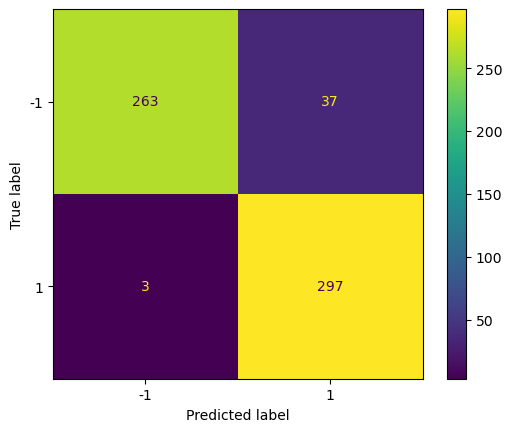

In [68]:
model = Pegasos(epochs=20, lambda_reg=1.0, seed=14)
model = model.fit(X_train, np.where(y_train == 5, -1, 1))
test_error = model.evaluate(X_test, np.where(y_test == 5, -1, 1))

#model.evaluate_v2(X_test, np.where(y_test == 5, -1, 1))